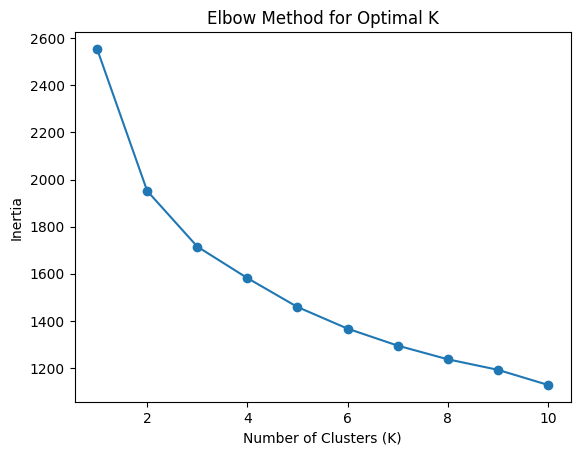

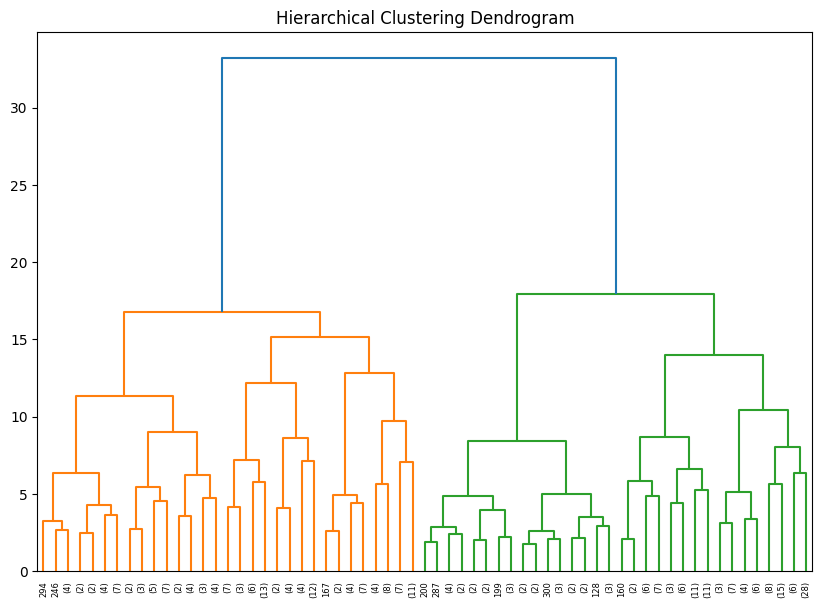

KMeans vs True Labels ARI: 0.385244040729193
Hierarchical vs True Labels ARI: 0.3610760049850183
KMeans Silhouette Score: 0.24416984917448778
Hierarchical Silhouette Score: 0.2008479774041015


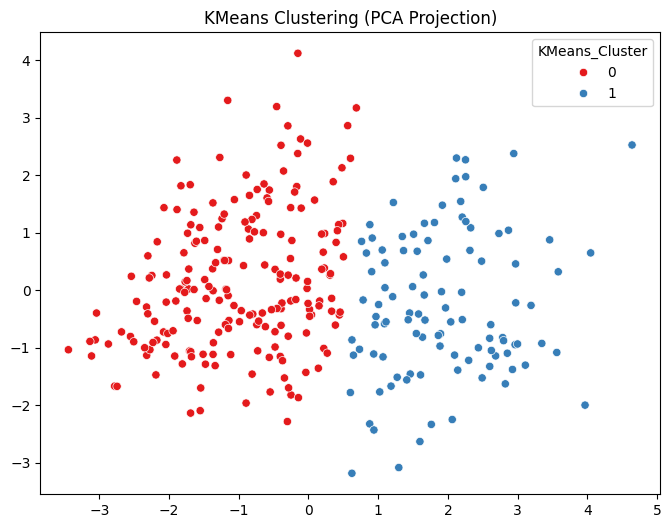

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv("../data/heart_disease_selected.csv")
X = df.drop("target", axis=1)
y = df["target"]

# --------------------------
# 1. K-Means Clustering
# --------------------------
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X)

# --------------------------
# 2. Hierarchical Clustering
# --------------------------
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
df["HC_Cluster"] = hc.fit_predict(X)

# --------------------------
# 3. Evaluation
# --------------------------
print("KMeans vs True Labels ARI:", adjusted_rand_score(y, df["KMeans_Cluster"]))
print("Hierarchical vs True Labels ARI:", adjusted_rand_score(y, df["HC_Cluster"]))
print("KMeans Silhouette Score:", silhouette_score(X, df["KMeans_Cluster"]))
print("Hierarchical Silhouette Score:", silhouette_score(X, df["HC_Cluster"]))

# --------------------------
# 4. Visualization with PCA
# --------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["KMeans_Cluster"], palette="Set1")
plt.title("KMeans Clustering (PCA Projection)")
plt.show()
